In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import cluster

Nous allons ici essayer de prédire la classe des passager (premier, seconde et troisièmement classe) a bord du Titanic.

In [2]:
titanic = pd.read_csv("./titanic_train.csv", index_col=0)
titanic

Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   
...               ...     ...   
887                 0       2   
888                 1       1   
889                 0       3   
890                 1       1   
891                 0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   
...                                                        ...     ...   ...   
887                                      Montvila, Rev. Juozas    male  27.0   
888                               Graham, Miss. Margaret Edith  female  19.0   
889                   Johnston, Miss. Catherine Helen "Carrie"  female   NaN   
890                                      Behr, Mr. Karl Howell    male  26.0   
891                                        Dooley, Mr. Patrick    male  32.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S  
2                1      0          PC 17599  71.2833   C85        C  
3                0      0  STON/O2. 3101282   7.9250   NaN        S  
4                1      0            113803  53.1000  C123        S  
5                0      0            373450   8.0500   NaN        S  
...            ...    ...               ...      ...   ...      ...  
887              0      0            211536  13.0000   NaN        S  
888              0      0            112053  30.0000   B42        S  
889              1      2        W./C. 6607  23.4500   NaN        S  
890              0      0            111369  30.0000  C148        C  
891              0      0            370376   7.7500   NaN        Q  

[891 rows x 11 columns]

On vérifie qu'il n'y ai pas de valeurs étranges ici il n'y en a pas

In [3]:
titanic.describe()

Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

On vérifie par la suite s'il y a des valeurs nul ici on peut voire que Age, Cabin et Embarked on des valeurs manquante

In [4]:
titanic.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Nous efféctuon un nettoyage des valeurs en suppriment les valeurs qui non pas d’importance et en suppriment les valeurs manquantes

In [5]:
titanic = titanic.drop(labels=['Name','Ticket','Cabin', 'Embarked'],axis=1)
titanic = titanic.dropna()
titanic

Survived  Pclass     Sex   Age  SibSp  Parch     Fare
PassengerId                                                       
1                   0       3    male  22.0      1      0   7.2500
2                   1       1  female  38.0      1      0  71.2833
3                   1       3  female  26.0      0      0   7.9250
4                   1       1  female  35.0      1      0  53.1000
5                   0       3    male  35.0      0      0   8.0500
...               ...     ...     ...   ...    ...    ...      ...
886                 0       3  female  39.0      0      5  29.1250
887                 0       2    male  27.0      0      0  13.0000
888                 1       1  female  19.0      0      0  30.0000
890                 1       1    male  26.0      0      0  30.0000
891                 0       3    male  32.0      0      0   7.7500

[714 rows x 7 columns]

In [6]:
titanic.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [7]:
titanic.describe(include=['O'])

Sex
count    714
unique     2
top     male
freq     453

In [8]:
pd.crosstab(titanic['Pclass'], titanic['Survived'], normalize=True)*100

Survived          0          1
Pclass                        
1          8.963585  17.086835
2         12.605042  11.624650
3         37.815126  11.904762

In [9]:
pd.crosstab(titanic['Pclass'], titanic['Fare'], normalize=True)*100

Fare    0.0000    4.0125    5.0000    6.2375    6.4375    6.4500    6.4958    \
Pclass                                                                         
1       0.420168  0.000000  0.140056  0.000000  0.000000  0.000000  0.000000   
2       0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3       0.560224  0.140056  0.000000  0.140056  0.140056  0.140056  0.280112   

Fare    6.7500    6.9750    7.0458    ...  151.5500  153.4625  164.8667  \
Pclass                                ...                                 
1       0.000000  0.000000  0.000000  ...  0.560224  0.420168  0.280112   
2       0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
3       0.280112  0.280112  0.140056  ...  0.000000  0.000000  0.000000   

Fare    211.3375  211.5000  227.5250  247.5208  262.3750  263.0000  512.3292  
Pclass                                                                        
1       0.420168  0.140056  0.420168  0.280112  0.280112  0.560224  0.420168  
2       0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
3       0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  

[3 rows x 220 columns]

On transforme la colonne Sex qui contient des caractères en valeur numérique

In [10]:
for col in titanic.columns :
    if titanic[col].dtypes == 'object' :
        le = LabelEncoder()
        titanic[col] = le.fit_transform(titanic[col])
titanic

Survived  Pclass  Sex   Age  SibSp  Parch     Fare
PassengerId                                                    
1                   0       3    1  22.0      1      0   7.2500
2                   1       1    0  38.0      1      0  71.2833
3                   1       3    0  26.0      0      0   7.9250
4                   1       1    0  35.0      1      0  53.1000
5                   0       3    1  35.0      0      0   8.0500
...               ...     ...  ...   ...    ...    ...      ...
886                 0       3    0  39.0      0      5  29.1250
887                 0       2    1  27.0      0      0  13.0000
888                 1       1    0  19.0      0      0  30.0000
890                 1       1    1  26.0      0      0  30.0000
891                 0       3    1  32.0      0      0   7.7500

[714 rows x 7 columns]

Ici nous efféctuon matrice do corrélation entre les valeurs affin de voir quelles valeurs sont liées entre elles. On peut voire qu'il y a une corrélation négative forte sur la classe de passager et le prix des billets se qui montre que plus un billet est cher plus la classe de passager est faible. On peut aussi voir une corrélation négative forte entre sex  et survived.

In [11]:
corr = titanic.corr()
corr

Survived    Pclass       Sex       Age     SibSp     Parch      Fare
Survived  1.000000 -0.359653 -0.538826 -0.077221 -0.017358  0.093317  0.268189
Pclass   -0.359653  1.000000  0.155460 -0.369226  0.067247  0.025683 -0.554182
Sex      -0.538826  0.155460  1.000000  0.093254 -0.103950 -0.246972 -0.184994
Age      -0.077221 -0.369226  0.093254  1.000000 -0.308247 -0.189119  0.096067
SibSp    -0.017358  0.067247 -0.103950 -0.308247  1.000000  0.383820  0.138329
Parch     0.093317  0.025683 -0.246972 -0.189119  0.383820  1.000000  0.205119
Fare      0.268189 -0.554182 -0.184994  0.096067  0.138329  0.205119  1.000000

<AxesSubplot:>

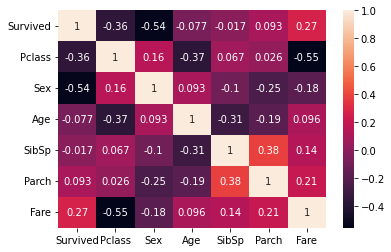

In [12]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

Nous utilisons la fonction train_test_split sur notre jeu de donnée affin d'avoir des données pour entraînée les algorithmes que nous utiliseront

In [13]:
X = titanic.drop(labels=['Pclass'], axis=1)
y = titanic['Pclass']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42)

# KNN

La première méthode que nous utiliseront est le KNN (le plus proche voisin) nous donnons a la fonction nos donnée d’entraînement et nous utiliserons les paramètres par défaut de la fonction

In [14]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

la précision avec les valeurs par défaut est d’environ 81 %

In [15]:
y_pred = knn.predict(X_test)
y_pred

array([2, 1, 3, 1, 1, 1, 2, 3, 3, 1, 3, 2, 3, 3, 3, 2, 1, 1, 1, 1, 2, 2,
       2, 3, 2, 3, 3, 3, 3, 2, 1, 3, 3, 3, 1, 1, 3, 2, 3, 3, 2, 3, 3, 1,
       3, 1, 3, 2, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 2, 1, 3, 2, 2, 2, 2, 3,
       3, 1, 3, 1, 3, 3, 3, 2, 2, 3, 1, 3, 2, 3, 3, 1, 1, 3, 2, 1, 3, 1,
       1, 2, 1, 3, 2, 3, 1, 3, 3, 3, 1, 1, 1, 3, 1, 3, 1, 2, 3, 2, 2, 2,
       3, 2, 1, 1, 1, 3, 3, 1, 3, 2, 3, 1, 3, 1, 1, 1, 1, 3, 2, 3, 3, 2,
       3, 2, 2, 3, 1, 3, 2, 3, 1, 1, 1, 3, 3, 3, 1, 3, 1, 3, 1, 1, 1, 1,
       3, 3, 3, 3, 2, 3, 3, 3, 1, 2, 3, 3, 2, 1, 2, 1, 2, 2, 3, 1, 3, 1,
       3, 3, 1], dtype=int64)

In [16]:
scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
print(scores.mean())

0.811214953271028


Nous allons essayer de trouver le nombre de voisin totale le plus précis ici on peut voir que le taux de précision le plus élevé est d’environ 84 % pour un voisin 

In [17]:
k_range = range(1, 31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.8467289719626168, 0.811214953271028, 0.8242990654205608, 0.8149532710280374, 0.811214953271028, 0.805607476635514, 0.811214953271028, 0.7962616822429907, 0.7962616822429907, 0.7962616822429907, 0.7981308411214952, 0.8037383177570092, 0.788785046728972, 0.7906542056074766, 0.7794392523364486, 0.7738317757009346, 0.7738317757009346, 0.7738317757009345, 0.7682242990654207, 0.7626168224299066, 0.7644859813084112, 0.7626168224299066, 0.7626168224299066, 0.7570093457943925, 0.7439252336448597, 0.7514018691588785, 0.742056074766355, 0.7383177570093458, 0.7327102803738318, 0.7383177570093457]


Text(0, 0.5, 'Cross-Validated Accuracy')

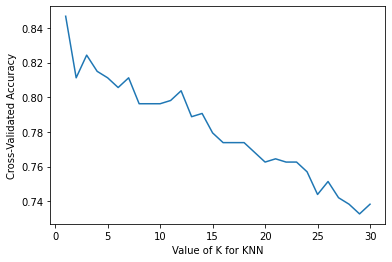

In [18]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

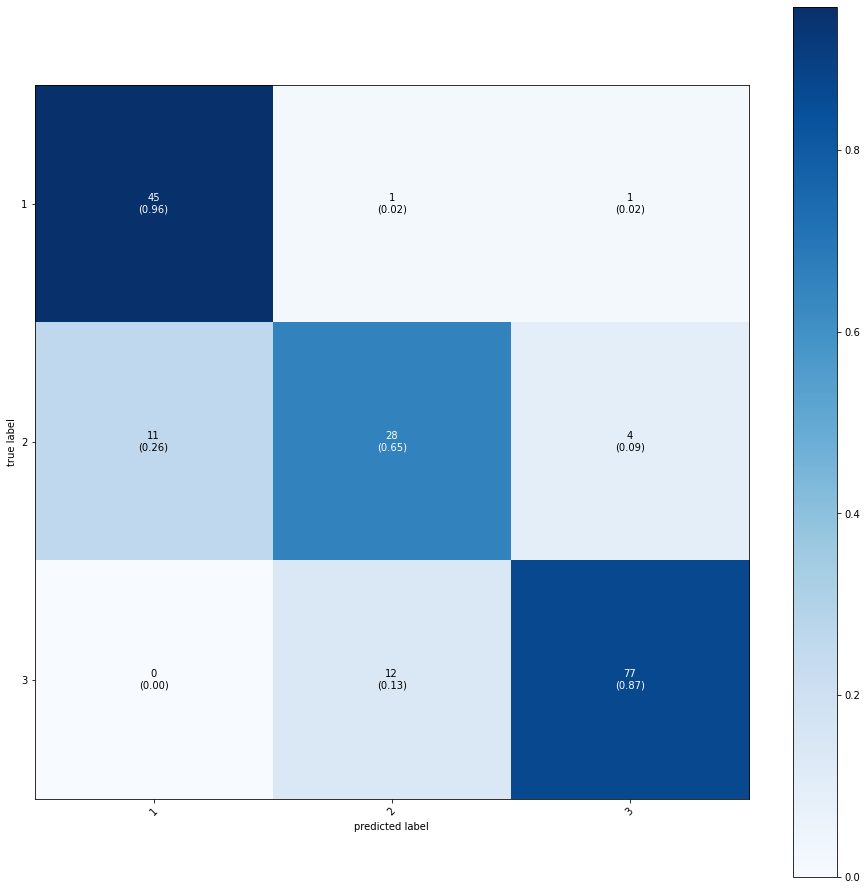

In [19]:
conf_mat = confusion_matrix(y_test, y_pred)

class_names = list(range(1, 4))
fig, ax = plot_confusion_matrix(conf_mat=conf_mat, 
                                colorbar=True, show_absolute=True, 
                                show_normed=True,class_names=class_names, 
                                figsize=(16, 16))

In [20]:
(conf_mat.diagonal().sum()/conf_mat.sum())*100

83.79888268156425

Nous utilisons cette fois la fonction avec un voisin est nous pouvons constater que le taux de précision est bien de 84 %

In [21]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [22]:
scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
print(scores.mean())

0.8467289719626168


# Decision Tree

La seconde méthode que nous utiliseront est l’arbre de décision nous donnons a la fonction nos donnée d’entraînement et nous utiliserons les paramètres par défaut de la fonction (profondeur de l'arbre maximum)

In [23]:
X = titanic.drop(labels=['Pclass'], axis=1)
y = titanic['Pclass']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42)

In [24]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [25]:
y_pred = tree.predict(X_test)
y_pred

array([2, 1, 3, 1, 1, 1, 2, 3, 3, 1, 3, 2, 3, 3, 3, 2, 2, 2, 2, 1, 2, 2,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 2, 3, 1,
       3, 1, 3, 2, 2, 1, 3, 2, 3, 3, 3, 3, 3, 2, 3, 1, 3, 2, 2, 2, 2, 3,
       3, 1, 3, 2, 3, 3, 3, 2, 2, 3, 2, 3, 2, 3, 3, 1, 1, 3, 3, 1, 3, 1,
       1, 2, 1, 3, 3, 3, 2, 3, 3, 3, 1, 1, 1, 3, 1, 3, 1, 2, 3, 3, 2, 2,
       3, 3, 2, 1, 1, 3, 3, 1, 3, 2, 3, 1, 3, 2, 1, 1, 1, 3, 3, 3, 3, 2,
       3, 2, 1, 3, 2, 3, 2, 3, 1, 1, 1, 3, 3, 3, 1, 3, 1, 3, 1, 2, 1, 1,
       3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 1, 3, 1, 2, 2, 3, 1, 3, 1,
       3, 3, 2], dtype=int64)

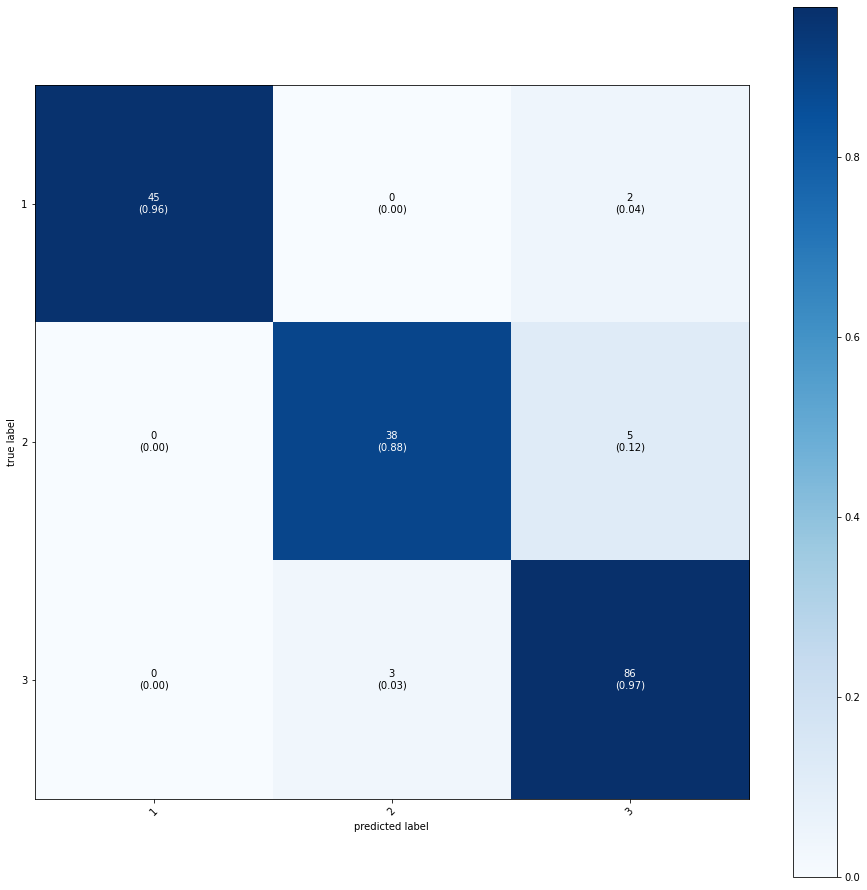

In [26]:
conf_mat = confusion_matrix(y_test, y_pred)

class_names = list(range(1, 4))
fig, ax = plot_confusion_matrix(conf_mat=conf_mat, 
                                colorbar=True, show_absolute=True, 
                                show_normed=True,class_names=class_names, 
                                figsize=(16, 16))

In [27]:
(conf_mat.diagonal().sum()/conf_mat.sum())*100

94.41340782122904

La précision est d’environ 94 %

In [28]:
(accuracy_score(y_test, y_pred))*100

94.41340782122904

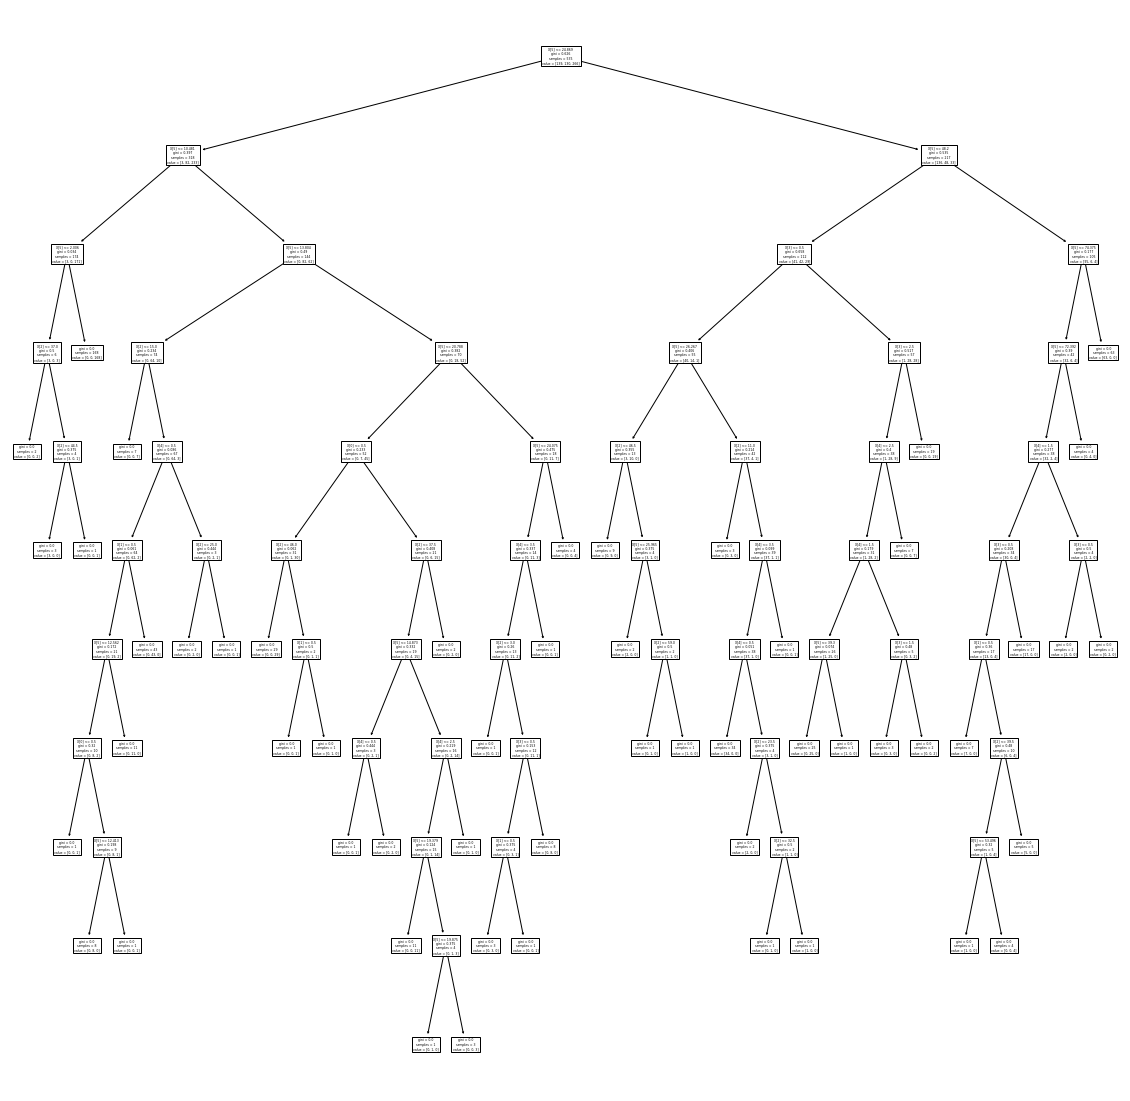

In [29]:
plt.figure(figsize = (20, 20))
titanic_tree = plot_tree(tree)

Nous allons essayer de trouver la profondeur de l’arbre la plus précise. La profondeur est de 6 pour une précision de 94 %. On peut voire que la précision n’augmente plus après

In [30]:
scores=[]
for max_depth in range(2, 11) : 
    tree=DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    tree.fit(X_train, y_train)
    score=tree.score(X_test, y_test)
    scores.append(score)

scores

[0.7877094972067039,
 0.8659217877094972,
 0.9162011173184358,
 0.9273743016759777,
 0.9497206703910615,
 0.9497206703910615,
 0.9385474860335196,
 0.9441340782122905,
 0.9441340782122905]

Nous donnons la nouvelle profondeur de six a l’algorithme

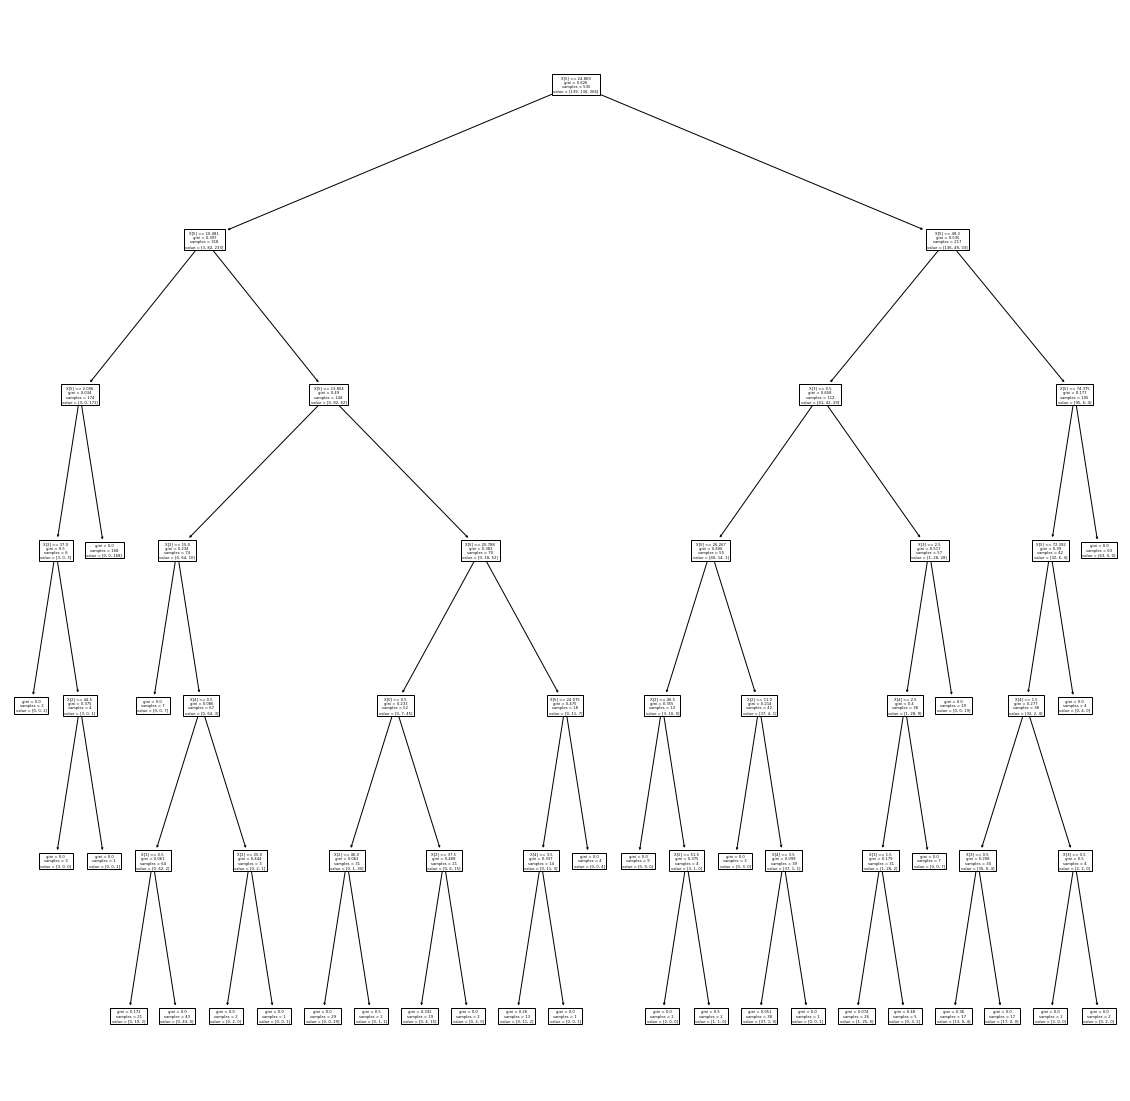

In [31]:
tree = DecisionTreeClassifier(max_depth=6, random_state=42)
tree.fit(X_train, y_train)
plt.figure(figsize = (20, 20))
titanic_tree = plot_tree(tree)

In [32]:
tree.score(X_test, y_test)

0.9497206703910615

# Random Forest

L’avant dernière méthode que nous utiliseront est la foret aléatoire avec comme toujours les paramètres par défaut

In [33]:
X = titanic.drop(labels=['Pclass'], axis=1)
y = titanic['Pclass']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42)

In [34]:
rf = RandomForestClassifier(n_jobs=-1, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [35]:
y_pred = rf.predict(X_test)
y_pred

array([2, 1, 3, 1, 1, 1, 2, 3, 3, 1, 3, 2, 3, 3, 3, 2, 2, 1, 2, 1, 2, 2,
       3, 3, 3, 3, 3, 3, 3, 2, 1, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 2, 3, 1,
       3, 1, 3, 2, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 2, 2, 2, 2, 3,
       3, 1, 3, 2, 3, 3, 3, 2, 2, 3, 2, 3, 2, 3, 3, 1, 1, 3, 3, 1, 3, 1,
       1, 2, 1, 3, 3, 3, 2, 3, 3, 3, 1, 1, 1, 3, 1, 3, 1, 2, 3, 3, 2, 2,
       3, 3, 2, 1, 1, 3, 3, 1, 3, 2, 3, 1, 3, 2, 1, 1, 1, 3, 3, 3, 3, 2,
       3, 2, 1, 3, 2, 3, 2, 3, 1, 1, 1, 3, 3, 3, 1, 3, 1, 3, 1, 2, 1, 1,
       3, 3, 3, 3, 2, 3, 3, 3, 1, 2, 3, 3, 3, 1, 3, 1, 2, 2, 3, 1, 3, 1,
       3, 3, 2], dtype=int64)

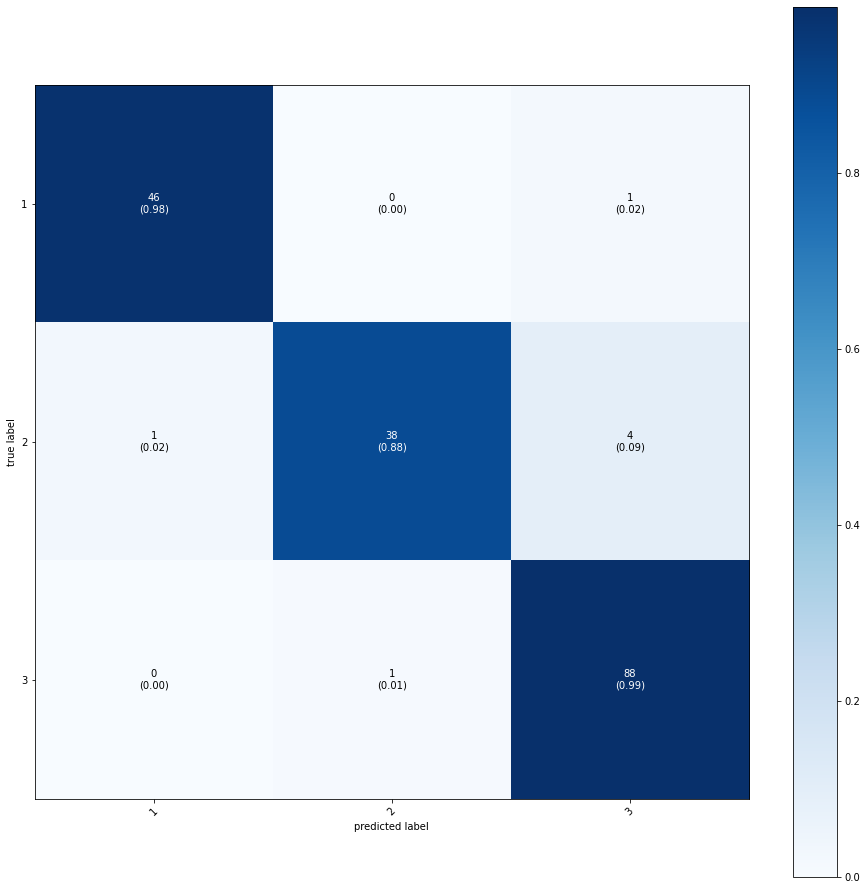

In [36]:
conf_mat = confusion_matrix(y_test, y_pred)

class_names = list(range(1, 4))
fig, ax = plot_confusion_matrix(conf_mat=conf_mat, 
                                colorbar=True, show_absolute=True, 
                                show_normed=True,class_names=class_names, 
                                figsize=(16, 16))

Nous obtenons une précision de 96 % avec un taux d’erreur de presque 4 %

In [37]:
(conf_mat.diagonal().sum()/conf_mat.sum())*100

96.08938547486034

In [38]:
(1 - rf.score(X_test, y_test)) * 100

3.9106145251396662

Nous allons essayer de trouver quelles seront les meilleurs paramètres pour la fonction. Nous allons d’abord tester le nombres d’arbres de la foret 

In [39]:
n_estimators = np.linspace(start = 1, stop = 300, num = 60, dtype = int)

In [40]:
err_default = 3.91
errors = []
for estimator in n_estimators :
    rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1, random_state=42)
    rf.fit(X_train, y_train)
    err = round((1.0 - rf.score(X_test, y_test)) * 100, 3)
    errors.append(err)
    print(f"\n\nResults : n_estimators = {rf.n_estimators} => err_test = {err}\n\n")
    print('Improvement of {:0.2f}%.'.format(err_default - err))



Results : n_estimators = 1 => err_test = 19.553


Improvement of -15.64%.


Results : n_estimators = 6 => err_test = 7.263


Improvement of -3.35%.


Results : n_estimators = 11 => err_test = 5.587


Improvement of -1.68%.


Results : n_estimators = 16 => err_test = 6.704


Improvement of -2.79%.


Results : n_estimators = 21 => err_test = 6.145


Improvement of -2.23%.


Results : n_estimators = 26 => err_test = 5.028


Improvement of -1.12%.


Results : n_estimators = 31 => err_test = 7.263


Improvement of -3.35%.


Results : n_estimators = 36 => err_test = 6.704


Improvement of -2.79%.


Results : n_estimators = 41 => err_test = 6.704


Improvement of -2.79%.


Results : n_estimators = 46 => err_test = 6.145


Improvement of -2.23%.


Results : n_estimators = 51 => err_test = 5.587


Improvement of -1.68%.


Results : n_estimators = 56 => err_test = 5.028


Improvement of -1.12%.


Results : n_estimators = 61 => err_test = 4.469


Improvement of -0.56%.


Results : n_estimators 

Nous pouvons constater que le taux d’erreur ne décent pas en dessous de celui que nous avons déjà

Text(0, 0.5, 'err_test')

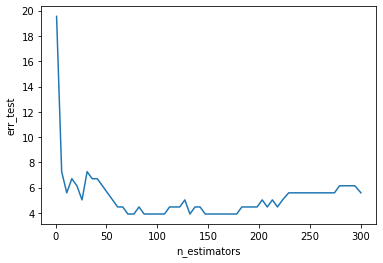

In [41]:
plt.plot(n_estimators, errors, label = 'test')
plt.xlabel('n_estimators')
plt.ylabel('err_test')

Nous allons maintenant tester la profondeur des arbres. Nous constatons que le taux d’erreur le plus faible se trouve à une profondeur d'arbre maximum. Les meilleurs paramètres pour la foret aléatoire serait ceux par défaut

In [42]:
max_depths = [i for i in np.linspace(start = 1, stop = 10, num = 10, dtype=int)]
max_depths.append(None)

In [43]:
errors = []
err_default = 9.99
for max_depth in max_depths:
    rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1, random_state=42)
    rf.fit(X_train, y_train)
    err = round((1.0 - rf.score(X_test, y_test)) * 100, 3)
    errors.append(err)
    print(f"\n\nResults : max_depth = {rf.max_depth} => err_test = {err}\n")
    print(f'Improvement of {err_default - err}%\n\n')



Results : max_depth = 1 => err_test = 28.492

Improvement of -18.502000000000002%




Results : max_depth = 2 => err_test = 26.257

Improvement of -16.267000000000003%




Results : max_depth = 3 => err_test = 20.67

Improvement of -10.680000000000001%




Results : max_depth = 4 => err_test = 11.173

Improvement of -1.1829999999999998%




Results : max_depth = 5 => err_test = 9.497

Improvement of 0.4930000000000003%




Results : max_depth = 6 => err_test = 7.263

Improvement of 2.7270000000000003%




Results : max_depth = 7 => err_test = 6.704

Improvement of 3.2860000000000005%




Results : max_depth = 8 => err_test = 6.704

Improvement of 3.2860000000000005%




Results : max_depth = 9 => err_test = 5.587

Improvement of 4.4030000000000005%




Results : max_depth = 10 => err_test = 6.145

Improvement of 3.8450000000000006%




Results : max_depth = None => err_test = 3.911

Improvement of 6.079000000000001%




Text(0.5, 0, 'max_depths')

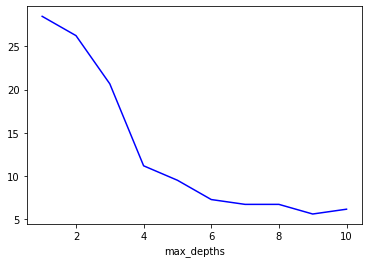

In [44]:
plt.plot(max_depths, errors, 'b')
plt.xlabel('max_depths')

# KMeans

La dernière méthode que nous utiliserons est le KMeans

In [45]:
titanic = pd.read_csv("./titanic_train.csv", index_col=2)
titanic = titanic.drop(labels=['Name','Ticket','Cabin', 'Embarked'],axis=1)
titanic = titanic.dropna()

In [46]:
for col in titanic.columns : 
    if titanic[col].dtypes == 'object' : 
        le = LabelEncoder()
        titanic[col] = le.fit_transform(titanic[col])

<AxesSubplot:>

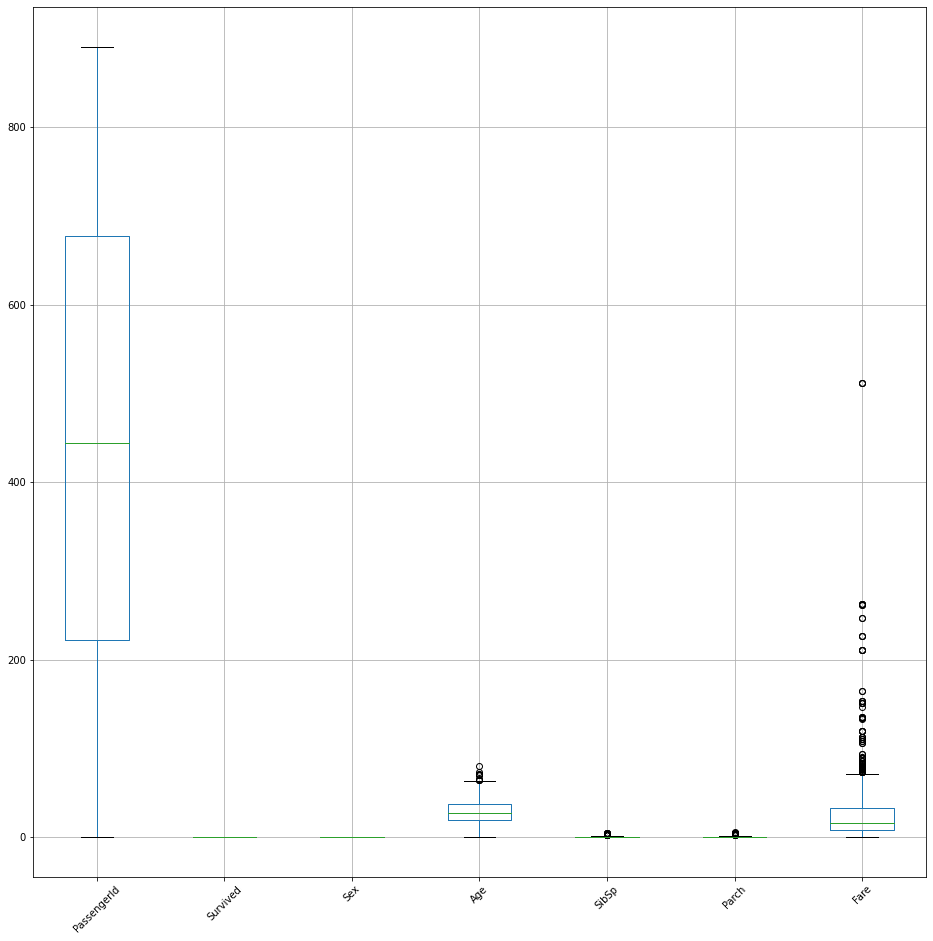

In [47]:
titanic.boxplot(rot=45, figsize=(16,16))

Nous ramenons toutes les données à l'échelle

In [48]:
min_max = MinMaxScaler()
titanic_minmax = min_max.fit_transform(titanic)
titanic_minmax

array([[0.        , 0.        , 1.        , ..., 0.2       , 0.        ,
        0.01415106],
       [0.0011236 , 1.        , 0.        , ..., 0.2       , 0.        ,
        0.13913574],
       [0.00224719, 1.        , 0.        , ..., 0.        , 0.        ,
        0.01546857],
       ...,
       [0.99662921, 1.        , 0.        , ..., 0.        , 0.        ,
        0.0585561 ],
       [0.9988764 , 1.        , 1.        , ..., 0.        , 0.        ,
        0.0585561 ],
       [1.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.01512699]])

Nous définissons le nombre de clusters à 3

In [49]:
km = KMeans(n_clusters=3, random_state=42)
km.fit(titanic_minmax)

KMeans(n_clusters=3, random_state=42)

In [50]:
km.labels_

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 2, 1, 2, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 2, 0, 2, 1, 0, 2, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 2, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 2, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 2, 1, 2, 0, 0, 1, 0, 1,
       2, 1, 1, 0, 1, 0, 0, 0, 2, 1, 0, 2, 1, 2, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 2, 0, 0, 2, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 2, 0, 1, 0, 0, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 2, 1, 1, 2, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 2, 0, 2, 0, 2, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 2, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 2, 0, 2, 1, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 2, 0, 0, 0, 1, 1,

In [51]:
titanic['cl_minmax' ]= km.labels_
titanic.sort_values('cl_minmax')

PassengerId  Survived  Sex   Age  SibSp  Parch      Fare  cl_minmax
Pclass                                                                     
3                 1         0    1  22.0      1      0    7.2500          0
3               529         0    1  39.0      0      0    7.9250          0
3               526         0    1  40.5      0      0    7.7500          0
3               522         0    1  22.0      0      0    7.8958          0
3               520         0    1  32.0      0      0    7.8958          0
...             ...       ...  ...   ...    ...    ...       ...        ...
3               430         1    1  32.0      0      0    8.0500          2
1               431         1    1  28.0      0      0   26.5500          2
2               227         1    1  19.0      0      0   10.5000          2
1               551         1    1  17.0      0      2  110.8833          2
3               221         1    1  16.0      0      0    8.0500          2

[714 rows x 8 columns]

In [52]:
pd.crosstab(titanic.index, titanic.cl_minmax)

cl_minmax    0    1   2
row_0                  
1           61   85  40
2           84   74  15
3          215  102  38

In [53]:
km.inertia_

176.99954906468147

Le meilleurs nombre de cluster serait entre 4 et 5 sellons la courbe de progression

*** For n_clusters = 2, inertia is 247.52020054354537 ***

*** For n_clusters = 3, inertia is 176.99954906468147 ***

*** For n_clusters = 4, inertia is 127.66844399244934 ***

*** For n_clusters = 5, inertia is 102.85278603131205 ***

*** For n_clusters = 6, inertia is 90.80782063319562 ***

*** For n_clusters = 7, inertia is 79.97796951356736 ***

*** For n_clusters = 8, inertia is 75.01486437274897 ***

*** For n_clusters = 9, inertia is 70.21374073925996 ***

*** For n_clusters = 10, inertia is 66.19476990687748 ***



Text(0.5, 1.0, 'Optimal nb of clusters')

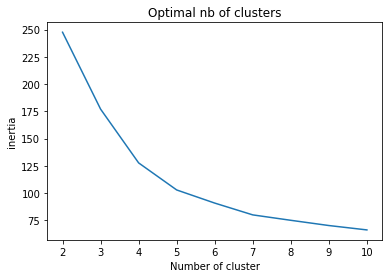

In [54]:
scores = {}
for k in range(2, 11):
    km = cluster.KMeans(n_clusters=k, random_state=42)
    km.fit(titanic_minmax)
    scores[k] = km.inertia_
    print(f'*** For n_clusters = {k}, inertia is {km.inertia_} ***\n')
plt.figure()
plt.plot(list(scores.keys()), list(scores.values()))
plt.xlabel("Number of cluster")
plt.ylabel("inertia")
plt.title("Optimal nb of clusters")

La méthode qui offre le moins de taux d'erreur pour deviner quelle est la classe des passager du Titanic serait la foret aléatoire avec une précision de 96 % suivi par l’arbre de décision a 94 %